In [1]:
import time
import os
import shutil
import sys
import h5py
import numpy                                  as np
import pandas                                 as pd

LocalFlg         = 'False'
if (not LocalFlg):
    WORKSPACE_PATH = "/home/venturi/WORKSPACE/"
    IP             = '128.174.245.172'
    User           = "venturi"
else:
    WORKSPACE_PATH = os.getenv('WORKSPACE_PATH')  
    
import matplotlib.pyplot                      as plt
plt.style.use(WORKSPACE_PATH+'/SurQCT/surqct/scripts/postprocessing/presentation.mplstyle')

In [2]:
### O2+O
Molecules        = ['O2_UMN']
PathToDiatPot    = [WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp']

TTran            = 20000.
RunFldrPrefixes  = ['/home/venturi/WORKSPACE/Air_Database/Run_0D/output_O3_UMN_',
                    '/home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/output_O3_UMN_Active_Run2_']
RunFldrSuffix    = '_0_1_1_0'
Labels           = ['QCT',
                    #'$K_{Inel}$ from NN']
                    '$K_{Inel}$ and $K_{Exch}$ from NN']

In [3]:
def compute_vibenergy(eint, vqn, jqn):
    NLevels = len(eint)
    EVib    = np.zeros((NLevels,1))
    ERot    = np.zeros((NLevels,1))
    ETemp   = np.zeros((np.amax(vqn)+1,1))
    for iLevel in range(NLevels):
        if (jqn[iLevel] == 0):
            EVib[iLevel]       = eint[iLevel]
            ETemp[vqn[iLevel]] = eint[iLevel]
        else:
            EVib[iLevel] = ETemp[vqn[iLevel]]
            ERot[iLevel] = eint[iLevel] - EVib[iLevel]
    return EVib, ERot

In [4]:
NMolecules = len(Molecules)
for iMol in range(NMolecules):
    
    
    ### Reading Levels Data
    if (LocalFlg):
        LevelsData        = pd.read_csv(PathToDiatPot[iMol], delim_whitespace=True, skiprows=15, header=None)
    else: 
        with sftp.Connection(host=IP, username=User) as conn:
            with conn.open(PathToDiatPot[iMol], "r") as f:
                LevelsData = pd.read_csv(PathToDiatPot[iMol], delim_whitespace=True, skiprows=15, header=None)
    LevelsData.columns    = ['vqn','jqn','EInt','egam','rMin','rMax','VMin','VMax','Tau','ri','ro']    
    
    
    ### Shifting Energies so that Zero is the Min of Diatomic Potential at J=0
    #LevelsData['EInt']    = ( LevelsData['EInt'].to_numpy() -  np.amin(LevelsData['VMin'].to_numpy()) ) * 27.211399
    LevelsData['EInt']    = ( LevelsData['EInt'].to_numpy() -  np.amin(LevelsData['EInt'].to_numpy()) ) * 27.211399
    LevelsData['VMax']    = ( LevelsData['VMax'].to_numpy() -  np.amin(LevelsData['VMin'].to_numpy()) ) * 27.211399
    LevelsData['VMin']    = ( LevelsData['VMin'].to_numpy() -  np.amin(LevelsData['VMin'].to_numpy()) ) * 27.211399
    
    
    ### Splitting Energy in Rotational and Vibrational Contribution
    EVib, ERot            = compute_vibenergy(LevelsData.EInt.to_numpy(), LevelsData.vqn.to_numpy(int), LevelsData.jqn.to_numpy(int))
    LevelsData['EVib']    = EVib
    LevelsData['ERot']    = ERot
    ETot                  = LevelsData['EInt'].to_numpy()

In [5]:
LevelsData['EInt'][0]

0.0

b'Skipping line 6118: expected 2 fields, saw 3\nSkipping line 12234: expected 2 fields, saw 3\nSkipping line 18350: expected 2 fields, saw 3\nSkipping line 24466: expected 2 fields, saw 3\nSkipping line 30582: expected 2 fields, saw 3\nSkipping line 36698: expected 2 fields, saw 3\nSkipping line 42814: expected 2 fields, saw 3\nSkipping line 48930: expected 2 fields, saw 3\nSkipping line 55046: expected 2 fields, saw 3\nSkipping line 61162: expected 2 fields, saw 3\nSkipping line 67278: expected 2 fields, saw 3\nSkipping line 73394: expected 2 fields, saw 3\nSkipping line 79510: expected 2 fields, saw 3\nSkipping line 85626: expected 2 fields, saw 3\nSkipping line 91742: expected 2 fields, saw 3\nSkipping line 97858: expected 2 fields, saw 3\nSkipping line 103974: expected 2 fields, saw 3\nSkipping line 110090: expected 2 fields, saw 3\nSkipping line 116206: expected 2 fields, saw 3\nSkipping line 122322: expected 2 fields, saw 3\nSkipping line 128438: expected 2 fields, saw 3\nSkippin

b'Skipping line 1577930: expected 2 fields, saw 3\nSkipping line 1584046: expected 2 fields, saw 3\nSkipping line 1590162: expected 2 fields, saw 3\nSkipping line 1596278: expected 2 fields, saw 3\nSkipping line 1602394: expected 2 fields, saw 3\nSkipping line 1608510: expected 2 fields, saw 3\nSkipping line 1614626: expected 2 fields, saw 3\nSkipping line 1620742: expected 2 fields, saw 3\nSkipping line 1626858: expected 2 fields, saw 3\nSkipping line 1632974: expected 2 fields, saw 3\nSkipping line 1639090: expected 2 fields, saw 3\nSkipping line 1645206: expected 2 fields, saw 3\nSkipping line 1651322: expected 2 fields, saw 3\nSkipping line 1657438: expected 2 fields, saw 3\nSkipping line 1663554: expected 2 fields, saw 3\nSkipping line 1669670: expected 2 fields, saw 3\nSkipping line 1675786: expected 2 fields, saw 3\nSkipping line 1681902: expected 2 fields, saw 3\nSkipping line 1688018: expected 2 fields, saw 3\nSkipping line 1694134: expected 2 fields, saw 3\nSkipping line 1700

b'Skipping line 3149742: expected 2 fields, saw 3\nSkipping line 3155858: expected 2 fields, saw 3\nSkipping line 3161974: expected 2 fields, saw 3\nSkipping line 3168090: expected 2 fields, saw 3\nSkipping line 3174206: expected 2 fields, saw 3\nSkipping line 3180322: expected 2 fields, saw 3\nSkipping line 3186438: expected 2 fields, saw 3\nSkipping line 3192554: expected 2 fields, saw 3\nSkipping line 3198670: expected 2 fields, saw 3\nSkipping line 3204786: expected 2 fields, saw 3\nSkipping line 3210902: expected 2 fields, saw 3\nSkipping line 3217018: expected 2 fields, saw 3\nSkipping line 3223134: expected 2 fields, saw 3\nSkipping line 3229250: expected 2 fields, saw 3\nSkipping line 3235366: expected 2 fields, saw 3\nSkipping line 3241482: expected 2 fields, saw 3\nSkipping line 3247598: expected 2 fields, saw 3\nSkipping line 3253714: expected 2 fields, saw 3\nSkipping line 3259830: expected 2 fields, saw 3\nSkipping line 3265946: expected 2 fields, saw 3\nSkipping line 3272

b'Skipping line 4721554: expected 2 fields, saw 3\nSkipping line 4727670: expected 2 fields, saw 3\nSkipping line 4733786: expected 2 fields, saw 3\nSkipping line 4739902: expected 2 fields, saw 3\nSkipping line 4746018: expected 2 fields, saw 3\nSkipping line 4752134: expected 2 fields, saw 3\nSkipping line 4758250: expected 2 fields, saw 3\nSkipping line 4764366: expected 2 fields, saw 3\nSkipping line 4770482: expected 2 fields, saw 3\nSkipping line 4776598: expected 2 fields, saw 3\nSkipping line 4782714: expected 2 fields, saw 3\nSkipping line 4788830: expected 2 fields, saw 3\nSkipping line 4794946: expected 2 fields, saw 3\nSkipping line 4801062: expected 2 fields, saw 3\nSkipping line 4807178: expected 2 fields, saw 3\nSkipping line 4813294: expected 2 fields, saw 3\nSkipping line 4819410: expected 2 fields, saw 3\nSkipping line 4825526: expected 2 fields, saw 3\nSkipping line 4831642: expected 2 fields, saw 3\nSkipping line 4837758: expected 2 fields, saw 3\nSkipping line 4843

b'Skipping line 6293366: expected 2 fields, saw 3\nSkipping line 6299482: expected 2 fields, saw 3\nSkipping line 6305598: expected 2 fields, saw 3\nSkipping line 6311714: expected 2 fields, saw 3\nSkipping line 6317830: expected 2 fields, saw 3\nSkipping line 6323946: expected 2 fields, saw 3\nSkipping line 6330062: expected 2 fields, saw 3\nSkipping line 6336178: expected 2 fields, saw 3\nSkipping line 6342294: expected 2 fields, saw 3\nSkipping line 6348410: expected 2 fields, saw 3\nSkipping line 6354526: expected 2 fields, saw 3\nSkipping line 6360642: expected 2 fields, saw 3\nSkipping line 6366758: expected 2 fields, saw 3\nSkipping line 6372874: expected 2 fields, saw 3\nSkipping line 6378990: expected 2 fields, saw 3\nSkipping line 6385106: expected 2 fields, saw 3\nSkipping line 6391222: expected 2 fields, saw 3\nSkipping line 6397338: expected 2 fields, saw 3\nSkipping line 6403454: expected 2 fields, saw 3\nSkipping line 6409570: expected 2 fields, saw 3\nSkipping line 6415

b'Skipping line 6118: expected 2 fields, saw 3\nSkipping line 12234: expected 2 fields, saw 3\nSkipping line 18350: expected 2 fields, saw 3\nSkipping line 24466: expected 2 fields, saw 3\nSkipping line 30582: expected 2 fields, saw 3\nSkipping line 36698: expected 2 fields, saw 3\nSkipping line 42814: expected 2 fields, saw 3\nSkipping line 48930: expected 2 fields, saw 3\nSkipping line 55046: expected 2 fields, saw 3\nSkipping line 61162: expected 2 fields, saw 3\nSkipping line 67278: expected 2 fields, saw 3\nSkipping line 73394: expected 2 fields, saw 3\nSkipping line 79510: expected 2 fields, saw 3\nSkipping line 85626: expected 2 fields, saw 3\nSkipping line 91742: expected 2 fields, saw 3\nSkipping line 97858: expected 2 fields, saw 3\nSkipping line 103974: expected 2 fields, saw 3\nSkipping line 110090: expected 2 fields, saw 3\nSkipping line 116206: expected 2 fields, saw 3\nSkipping line 122322: expected 2 fields, saw 3\nSkipping line 128438: expected 2 fields, saw 3\nSkippin

b'Skipping line 1314942: expected 2 fields, saw 3\nSkipping line 1321058: expected 2 fields, saw 3\nSkipping line 1327174: expected 2 fields, saw 3\nSkipping line 1333290: expected 2 fields, saw 3\nSkipping line 1339406: expected 2 fields, saw 3\nSkipping line 1345522: expected 2 fields, saw 3\nSkipping line 1351638: expected 2 fields, saw 3\nSkipping line 1357754: expected 2 fields, saw 3\nSkipping line 1363870: expected 2 fields, saw 3\nSkipping line 1369986: expected 2 fields, saw 3\nSkipping line 1376102: expected 2 fields, saw 3\nSkipping line 1382218: expected 2 fields, saw 3\nSkipping line 1388334: expected 2 fields, saw 3\nSkipping line 1394450: expected 2 fields, saw 3\nSkipping line 1400566: expected 2 fields, saw 3\nSkipping line 1406682: expected 2 fields, saw 3\nSkipping line 1412798: expected 2 fields, saw 3\nSkipping line 1418914: expected 2 fields, saw 3\nSkipping line 1425030: expected 2 fields, saw 3\nSkipping line 1431146: expected 2 fields, saw 3\nSkipping line 1437

b'Skipping line 2623766: expected 2 fields, saw 3\nSkipping line 2629882: expected 2 fields, saw 3\nSkipping line 2635998: expected 2 fields, saw 3\nSkipping line 2642114: expected 2 fields, saw 3\nSkipping line 2648230: expected 2 fields, saw 3\nSkipping line 2654346: expected 2 fields, saw 3\nSkipping line 2660462: expected 2 fields, saw 3\nSkipping line 2666578: expected 2 fields, saw 3\nSkipping line 2672694: expected 2 fields, saw 3\nSkipping line 2678810: expected 2 fields, saw 3\nSkipping line 2684926: expected 2 fields, saw 3\nSkipping line 2691042: expected 2 fields, saw 3\nSkipping line 2697158: expected 2 fields, saw 3\nSkipping line 2703274: expected 2 fields, saw 3\nSkipping line 2709390: expected 2 fields, saw 3\nSkipping line 2715506: expected 2 fields, saw 3\nSkipping line 2721622: expected 2 fields, saw 3\nSkipping line 2727738: expected 2 fields, saw 3\nSkipping line 2733854: expected 2 fields, saw 3\nSkipping line 2739970: expected 2 fields, saw 3\nSkipping line 2746

b'Skipping line 3938706: expected 2 fields, saw 3\nSkipping line 3944822: expected 2 fields, saw 3\nSkipping line 3950938: expected 2 fields, saw 3\nSkipping line 3957054: expected 2 fields, saw 3\nSkipping line 3963170: expected 2 fields, saw 3\nSkipping line 3969286: expected 2 fields, saw 3\nSkipping line 3975402: expected 2 fields, saw 3\nSkipping line 3981518: expected 2 fields, saw 3\nSkipping line 3987634: expected 2 fields, saw 3\nSkipping line 3993750: expected 2 fields, saw 3\nSkipping line 3999866: expected 2 fields, saw 3\nSkipping line 4005982: expected 2 fields, saw 3\nSkipping line 4012098: expected 2 fields, saw 3\nSkipping line 4018214: expected 2 fields, saw 3\nSkipping line 4024330: expected 2 fields, saw 3\nSkipping line 4030446: expected 2 fields, saw 3\nSkipping line 4036562: expected 2 fields, saw 3\nSkipping line 4042678: expected 2 fields, saw 3\nSkipping line 4048794: expected 2 fields, saw 3\nSkipping line 4054910: expected 2 fields, saw 3\nSkipping line 4061

b'Skipping line 5247530: expected 2 fields, saw 3\nSkipping line 5253646: expected 2 fields, saw 3\nSkipping line 5259762: expected 2 fields, saw 3\nSkipping line 5265878: expected 2 fields, saw 3\nSkipping line 5271994: expected 2 fields, saw 3\nSkipping line 5278110: expected 2 fields, saw 3\nSkipping line 5284226: expected 2 fields, saw 3\nSkipping line 5290342: expected 2 fields, saw 3\nSkipping line 5296458: expected 2 fields, saw 3\nSkipping line 5302574: expected 2 fields, saw 3\nSkipping line 5308690: expected 2 fields, saw 3\nSkipping line 5314806: expected 2 fields, saw 3\nSkipping line 5320922: expected 2 fields, saw 3\nSkipping line 5327038: expected 2 fields, saw 3\nSkipping line 5333154: expected 2 fields, saw 3\nSkipping line 5339270: expected 2 fields, saw 3\nSkipping line 5345386: expected 2 fields, saw 3\nSkipping line 5351502: expected 2 fields, saw 3\nSkipping line 5357618: expected 2 fields, saw 3\nSkipping line 5363734: expected 2 fields, saw 3\nSkipping line 5369

b'Skipping line 6556354: expected 2 fields, saw 3\nSkipping line 6562470: expected 2 fields, saw 3\nSkipping line 6568586: expected 2 fields, saw 3\nSkipping line 6574702: expected 2 fields, saw 3\nSkipping line 6580818: expected 2 fields, saw 3\nSkipping line 6586934: expected 2 fields, saw 3\nSkipping line 6593050: expected 2 fields, saw 3\nSkipping line 6599166: expected 2 fields, saw 3\nSkipping line 6605282: expected 2 fields, saw 3\nSkipping line 6611398: expected 2 fields, saw 3\nSkipping line 6617514: expected 2 fields, saw 3\nSkipping line 6623630: expected 2 fields, saw 3\nSkipping line 6629746: expected 2 fields, saw 3\nSkipping line 6635862: expected 2 fields, saw 3\nSkipping line 6641978: expected 2 fields, saw 3\nSkipping line 6648094: expected 2 fields, saw 3\nSkipping line 6654210: expected 2 fields, saw 3\nSkipping line 6660326: expected 2 fields, saw 3\nSkipping line 6666442: expected 2 fields, saw 3\nSkipping line 6672558: expected 2 fields, saw 3\nSkipping line 6678

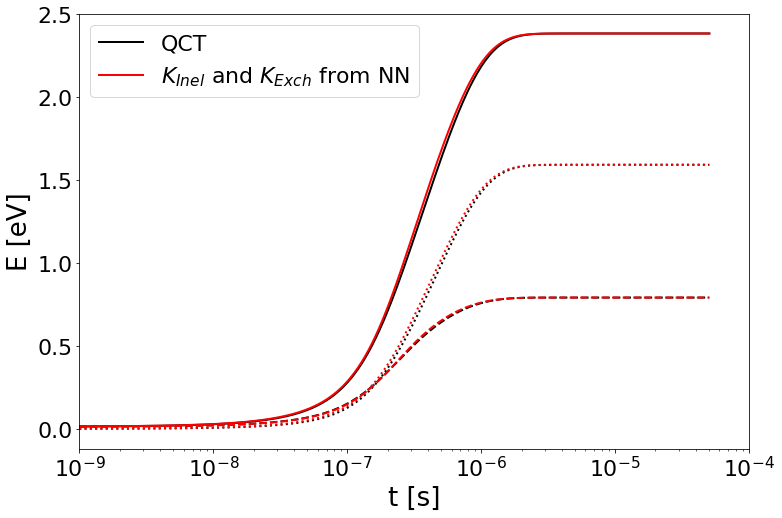

In [6]:
iVec     = [16, 15, 14, 13]
colorVec = ['k','r','b','g']
plt.figure(figsize=(12,8))
j=0
for RunFldrPrefix in RunFldrPrefixes:    
    RunFldr = RunFldrPrefix + 'T' + str(int(TTran)) + 'K' + RunFldrSuffix
    
    Data    = pd.read_csv(RunFldr+'/box.dat', delim_whitespace=True, header=None)
    t       = Data[0]

    Data    = pd.read_csv(RunFldr+'/pop_O2.dat', delim_whitespace=True, header=None, skiprows=2, error_bad_lines=False)
    Pops    = np.reshape(Data[1].to_numpy(), (-1, 6115))

    EIntLev = Pops * ETot.T
    EVibLev = Pops * EVib.T
    ERotLev = Pops * ERot.T

    EIntTot = np.sum(EIntLev, axis=1) / np.sum(Pops, axis=1)
    EVibTot = np.sum(EVibLev, axis=1) / np.sum(Pops, axis=1)
    ERotTot = np.sum(ERotLev, axis=1) / np.sum(Pops, axis=1)


    plt.plot(t, EIntTot, '-'+colorVec[j], label=r''+Labels[j])
    plt.plot(t, EVibTot, ':'+colorVec[j])
    plt.plot(t, ERotTot, '--'+colorVec[j])
    
    j += 1

plt.xscale('log')
plt.xlim([1.e-9, 1.e-4])
plt.xlabel('t [s]')
plt.ylabel('E [eV]')
plt.legend()